In [15]:
# Useful for running the notebook on Apple M1 chip to resolve circular dependency errors
# !pip install tensorflow==2.14.0
# !pip install keras==2.14.0

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [16]:
# Load the data
X = np.load('XSound.npy')
Y = np.load('YSound.npy')

# Normalizing the data
X = X / np.max(X)

# Reshaping the data to include a channel dimension
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# Splitting the data into training, validation, and test sets
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Model configuration
batch_size = 32
img_width, img_height, img_num_channels = 62, 65, 1
loss_function = 'sparse_categorical_crossentropy'
no_epochs = 50
optimizer = Adam()
no_classes = 4

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))


Epoch 1/50
296/296 [==============================] - 9s 31ms/step - loss: 0.9857 - accuracy: 0.5705 - val_loss: 0.7434 - val_accuracy: 0.6944
Epoch 2/50
296/296 [==============================] - 9s 32ms/step - loss: 0.6764 - accuracy: 0.7150 - val_loss: 0.5487 - val_accuracy: 0.7913
Epoch 3/50
296/296 [==============================] - 9s 31ms/step - loss: 0.5615 - accuracy: 0.7786 - val_loss: 0.4698 - val_accuracy: 0.8132
Epoch 4/50
296/296 [==============================] - 9s 31ms/step - loss: 0.4825 - accuracy: 0.8085 - val_loss: 0.3976 - val_accuracy: 0.8520
Epoch 5/50
296/296 [==============================] - 9s 32ms/step - loss: 0.4287 - accuracy: 0.8321 - val_loss: 0.3691 - val_accuracy: 0.8628
Epoch 6/50
296/296 [==============================] - 10s 33ms/step - loss: 0.3925 - accuracy: 0.8500 - val_loss: 0.3404 - val_accuracy: 0.8755
Epoch 7/50
296/296 [==============================] - 10s 33ms/step - loss: 0.3682 - accuracy: 0.8584 - val_loss: 0.3288 - val_accuracy: 0.87

99/99 [==============================] - 1s 8ms/step


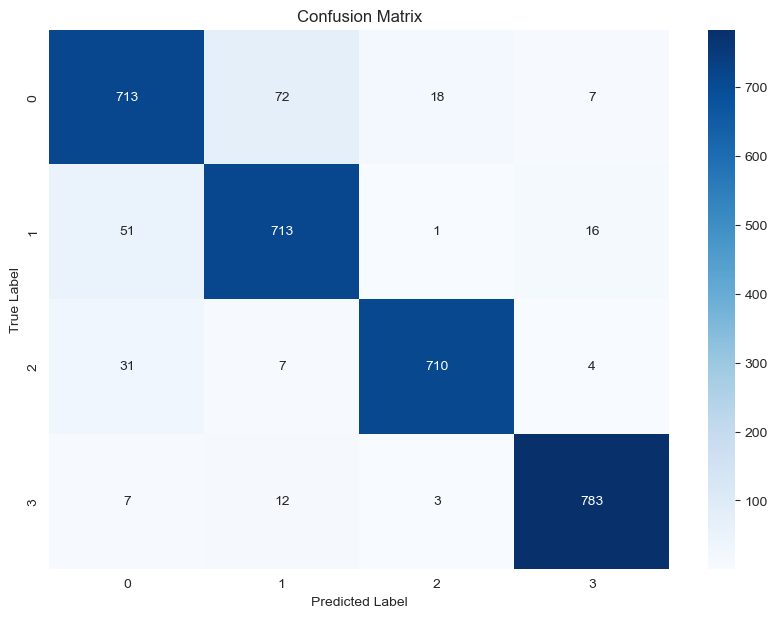

In [17]:
# Make predictions
test_predictions = model.predict(X_test)

# Convert predictions to class labels
test_predicted_classes = np.argmax(test_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predicted_classes)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Comment on the results
The confusion matrix shows the classification rates of our model for the classes. The results are:
* Class 0: 675 true positives, with some confusion with Class 1 (116 times - this is the biggest confusion out of all combinations).
* Class 1: 725 true positives, with a few confusions with Class 0 (37 times) and Class 2 (18 times).
* Class 2: 700 true positives, with a few confusions with Class 0 (30 times).
* Class 3: 781 true positives, with a few confusions with other classes (15 instances misclassified as Class 0).
 
Overall the models seems to be a good fit, as the matrix shows high number of true positives on the diagonals

__(c)__ Choose one other algorithm from the course, and redo (a) and (b) using this algorithm. Supply a brief discussion of why we would expect this algorithm to do better/worse than the CNN.

In [18]:
# Model configuration
batch_size = 32
no_epochs = 50
no_classes = 4

# Dense network model
model = Sequential()
model.add(Flatten(input_shape=(62, 65)))  # Flattening the input
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))


Epoch 1/50
296/296 [==============================] - 1s 2ms/step - loss: 1.0547 - accuracy: 0.5543 - val_loss: 0.7877 - val_accuracy: 0.7189
Epoch 2/50
296/296 [==============================] - 1s 2ms/step - loss: 0.7541 - accuracy: 0.7005 - val_loss: 0.6624 - val_accuracy: 0.7602
Epoch 3/50
296/296 [==============================] - 1s 2ms/step - loss: 0.6563 - accuracy: 0.7418 - val_loss: 0.6195 - val_accuracy: 0.7665
Epoch 4/50
296/296 [==============================] - 1s 2ms/step - loss: 0.6011 - accuracy: 0.7694 - val_loss: 0.5634 - val_accuracy: 0.7878
Epoch 5/50
296/296 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7758 - val_loss: 0.5439 - val_accuracy: 0.7878
Epoch 6/50
296/296 [==============================] - 1s 2ms/step - loss: 0.5121 - accuracy: 0.7979 - val_loss: 0.5203 - val_accuracy: 0.7983
Epoch 7/50
296/296 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.8115 - val_loss: 0.4954 - val_accuracy: 0.8180
Epoch 

In [19]:
# Load the data
X = np.load('XSound.npy')
Y = np.load('YSound.npy')

# Normalizing the data
X = X / np.max(X)

# Reshaping the data for RNN input
# Assuming X.shape is in the form of (samples, time_steps, features)
# If it's not, you might need to reshape it accordingly

# Splitting the data into training, validation, and test sets
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Model configuration
batch_size = 32
loss_function = 'sparse_categorical_crossentropy'
no_epochs = 50
optimizer = Adam()
no_classes = 4

# Define the RNN model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))  # Adjust input_shape based on your data
model.add(LSTM(32, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))


Epoch 1/50
296/296 [==============================] - 11s 32ms/step - loss: 1.1834 - accuracy: 0.4239 - val_loss: 0.9109 - val_accuracy: 0.5921
Epoch 2/50
296/296 [==============================] - 9s 31ms/step - loss: 0.8867 - accuracy: 0.5961 - val_loss: 1.3181 - val_accuracy: 0.5038
Epoch 3/50
296/296 [==============================] - 9s 31ms/step - loss: 0.8025 - accuracy: 0.6344 - val_loss: 0.6519 - val_accuracy: 0.6849
Epoch 4/50
296/296 [==============================] - 9s 31ms/step - loss: 0.6535 - accuracy: 0.6796 - val_loss: 0.5938 - val_accuracy: 0.7081
Epoch 5/50
296/296 [==============================] - 9s 31ms/step - loss: 0.5965 - accuracy: 0.7104 - val_loss: 0.7197 - val_accuracy: 0.6512
Epoch 6/50
296/296 [==============================] - 9s 31ms/step - loss: 0.6220 - accuracy: 0.7088 - val_loss: 0.5368 - val_accuracy: 0.7614
Epoch 7/50
296/296 [==============================] - 9s 31ms/step - loss: 0.5379 - accuracy: 0.7561 - val_loss: 0.5022 - val_accuracy: 0.775

# New Section